# Quiz 2
Instrucciones: Soy uno de tu clientes. Te pedi desde el 2019 que invirtieras mi dinero en 5 empresas que estuvieran en el S&P 500 a tu elección. Ya pasaron 5 años tengo varias dudas.

## Pregunta 1

¿Me podrías mostrar graficamente como se ha comportado el precio de la acción de manera diaria?

In [30]:
import yfinance as yf

In [31]:
# Función para descargar precios de cierre ajustados:
def get_adj_close(tickets, start=None, end=None):
    return yf.download(tickets, start=start, end=end)['Adj Close']

In [32]:
# Información
names = ['AAPL', 'MSFT', 'AMZN', 'GOOGL', 'T']
start_date = '2019-01-01'
end_date = '2024-1-31'

In [33]:
# Precios diarios
closes = get_adj_close(tickets=names,
                        start=start_date,
                      end = end_date)
closes.head()

[*********************100%%**********************]  5 of 5 completed


Ticker,AAPL,AMZN,GOOGL,MSFT,T
Date,,,,,
2019-01-02,37.893341,76.956497,52.734001,96.023285,14.698756
2019-01-03,34.118874,75.014000,51.273499,92.490761,14.718657
2019-01-04,35.575386,78.769501,53.903500,96.792442,15.096827
2019-01-07,35.496204,81.475502,53.796001,96.915886,15.370498
2019-01-08,36.172882,82.829002,54.268501,97.618584,15.564559


<AxesSubplot:xlabel='Date'>

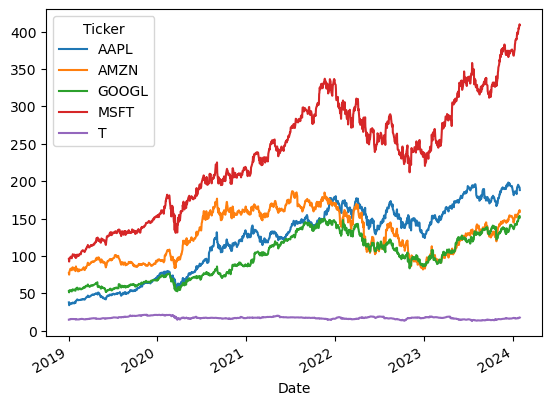

In [34]:
# Gráfico de histórico de precios diarios
closes.plot()

## Pregunta 2

¿Me podrías mostrar una grafica que tengan los rendimientos diarios de 1 de las acciones que mas te interese y me podrías dar alguna conclusión de la grafica?

In [35]:
# Información
names = ['T']
start_date = '2019-01-01'
end_date = '2024-1-31'

In [36]:
# Precios diarios
closes = get_adj_close(tickets=names,
                        start=start_date,
                      end = end_date)
closes.head()

[*********************100%%**********************]  1 of 1 completed


Date
2019-01-02    14.698756
2019-01-03    14.718657
2019-01-04    15.096827
2019-01-07    15.370498
2019-01-08    15.564559
Name: Adj Close, dtype: float64

<AxesSubplot:xlabel='Date'>

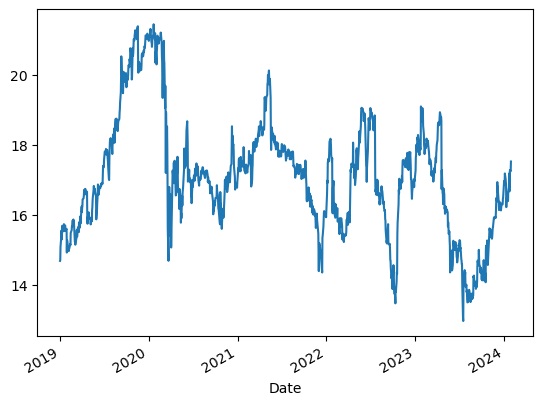

In [10]:
closes.plot()

## Pregunta 3

¿Me podrías compartir en una tabla el rendimiento medio analizado y la volatilidad anualizada de cada una de las acciones?

In [37]:
import pandas as pd

# Suponiendo que ya tienes un DataFrame llamado 'daily_returns' con los rendimientos diarios

# Calcular el rendimiento medio diario
mean_daily_returns = daily_returns.mean()

# Anualizar los rendimientos multiplicando por el número de días hábiles en un año (252)
annual_mean_returns = 252 * mean_daily_returns

# Crear un DataFrame para reportar los resultados
resultados_rendimientos = pd.DataFrame({
    'Rendimiento Medio Diario': mean_daily_returns,
    'Rendimiento Anualizado': annual_mean_returns
})

# Mostrar el DataFrame con los resultados
print("Resultados de rendimientos:")
print(resultados_rendimientos)


Resultados de rendimientos:
        Rendimiento Medio Diario  Rendimiento Anualizado
Ticker                                                  
AAPL                    0.001460                0.367878
AMZN                    0.000812                0.204543
GOOGL                   0.001025                0.258386
MSFT                    0.001317                0.331835
T                       0.000275                0.069261


In [38]:
import numpy as np

# Suponiendo que ya tienes un DataFrame llamado 'daily_returns' con los rendimientos diarios

# Calcular la volatilidad diaria
daily_volatility = daily_returns.std()

# Anualizar la volatilidad multiplicando por la raíz cuadrada del número de días hábiles en un año (252)
annual_volatility = np.sqrt(252) * daily_volatility

# Crear un DataFrame para reportar los resultados
resultados_volatilidad = pd.DataFrame({
    'Volatilidad Diaria': daily_volatility,
    'Volatilidad Anualizada': annual_volatility
})

# Mostrar el DataFrame con los resultados
print("\nResultados de volatilidad:")
print(resultados_volatilidad)



Resultados de volatilidad:
        Volatilidad Diaria  Volatilidad Anualizada
Ticker                                            
AAPL              0.020232                0.321168
AMZN              0.022071                0.350361
GOOGL             0.019936                0.316467
MSFT              0.019089                0.303029
T                 0.016532                0.262432


## Pregunta 4

¿Cual es la relación entre volatilidad y rendimiento en estos 5 activos en los que me invertiste? 
- ¿Si hubiese un activo hipotetico con 0 volatilidad cuanto sería el rendimiento esperado?
- ¿Por cada 1% de volatilidad que aumentan los activos cuanto incrementa el rendimiento?
- ¿Podrías mostrarme gráficamente el resultado de esta relación así como poner en la misma gráfica donde se encuentran los activos respecto a su volatilidad y rendimiento?

In [39]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt


In [40]:
# Resumen en base anual
annual_ret_summary = pd.DataFrame({'Media': 252 * daily_returns.mean(), 'Vol': np.sqrt(252) * daily_returns.std()})
annual_ret_summary

,Media,Vol
Ticker,,
AAPL,0.367878,0.321168
AMZN,0.204543,0.350361
GOOGL,0.258386,0.316467
MSFT,0.331835,0.303029
T,0.069261,0.262432


Ordenada al eje y (intercept): -0.33
Pendiente de la función: 1.85


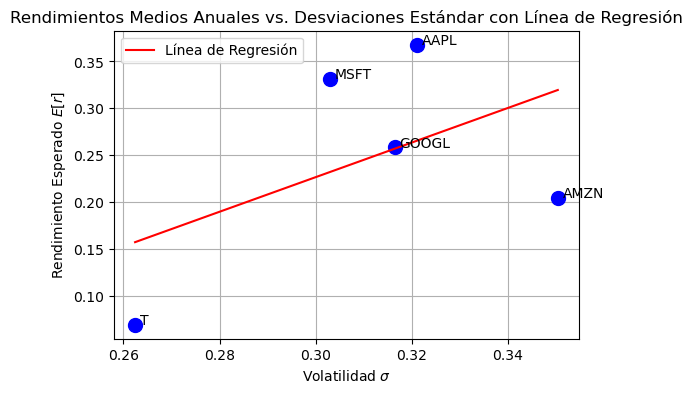

Ecuación de la Línea de Regresión:
$E[r] = 1.85 \cdot \sigma + -0.33$


In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Asumiendo que annual_ret_summary ya está definido

# Ajustar una línea recta a los puntos
slope, intercept, r_value, p_value, std_err = linregress(annual_ret_summary['Vol'], annual_ret_summary['Media'])

# Crear la ecuación de la línea recta
line_equation = f'$E[r] = {slope:.2f} \cdot \sigma + {intercept:.2f}$'

# Imprimir la ordenada al origen (intercept) y la pendiente
print(f'Ordenada al eje y (intercept): {intercept:.2f}')
print(f'Pendiente de la función: {slope:.2f}')

# Mostrar el gráfico original con la línea recta ajustada
plt.figure(figsize=(6, 4))
for i in range(len(annual_ret_summary)):
    plt.plot(annual_ret_summary.iloc[i, 1], annual_ret_summary.iloc[i, 0], 'ob', ms=10)
    plt.text(annual_ret_summary.iloc[i, 1]+0.001, annual_ret_summary.iloc[i, 0], annual_ret_summary.index[i])

# Agregar la línea de regresión al gráfico
volatility_range = np.linspace(annual_ret_summary['Vol'].min(), annual_ret_summary['Vol'].max(), 100)
plt.plot(volatility_range, slope * volatility_range + intercept, color='red', label='Línea de Regresión')
plt.title('Rendimientos Medios Anuales vs. Desviaciones Estándar con Línea de Regresión')
plt.xlabel('Volatilidad $\sigma$')
plt.ylabel('Rendimiento Esperado $E[r]$')
plt.legend()
plt.grid()
plt.show()

# Mostrar la ecuación de la línea recta
print('Ecuación de la Línea de Regresión:')
print(line_equation)


¿Cual es la relación entre volatilidad y rendimiento en estos 5 activos en los que me invertiste? 


**Solo AT&T tiene una volatilidad menor a .05 pero su rendimiento es muy bajo asi que aqui aplica la ley de el que no arriesga no gana**

- ¿Si hubiese un activo hipotetico con 0 volatilidad cuanto sería el rendimiento esperado?


**Me imagino que 0 pero los cetes la volatilidad es nula y los rendimientos son muy buenos**

- ¿Por cada 1% de volatilidad que aumentan los activos cuanto incrementa el rendimiento?


**por cada unidad de volatilidad aumenta el rendimiento un 1.85**

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Carlos Kelly.
</footer>